In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

from scipy.optimize import curve_fit

In [2]:
def return_cubic_topology(N):

    topology_parameter = {
        "Nx"    : N,
        "Ny"    : N,
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[N-1,N-1,0]]
    }

    return topology_parameter

def return_string_topology(N):

    topology_parameter = {
        "Nx"    : N,
        "Ny"    : 1,
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[N-1,0,0]]
    }

    return topology_parameter

def fit_func(x, a, b, c):
    return a * (x - b) + c

## Cubic Network of Nanoparticles

In [3]:
results_c   = {}
V_arr       = np.zeros((100,3))
V_min       = 0.5
V_max       = 1.0
V_arr[:,0]  = np.linspace(V_min, V_max, 100, endpoint=True)

for N in range(3,13):

    topology_parameter  = return_cubic_topology(N)
    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    
    np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)

    results_c[N] = np_network_cubic.return_output_values()

In [4]:
p_vals = []

for N in results_c.keys():

    p, cov = curve_fit(fit_func, V_arr[:,0], results_c[N][:,2])

    p_vals.append(p)

/home/jonas/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [5]:
slopes  = np.array([p[0] for p in p_vals])
scale   = slopes[4]/slopes
p, cov  = curve_fit(fit_func, np.arange(3,13)**2, scale)

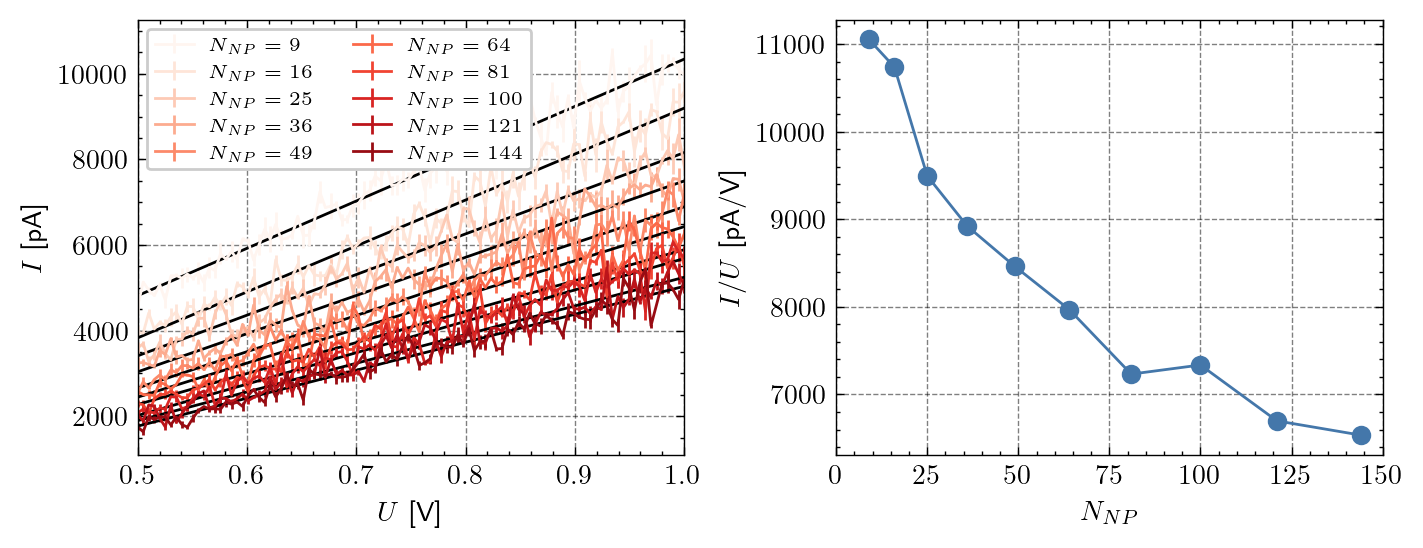

In [6]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(range(3,13)):

        ax.errorbar(V_arr[:,0], results_c[N][:,2], results_c[N][:,3], c=cmap(i/len(results_c.keys())), label='$N_{NP} = '+f' {N*N}$')
        ax.plot(V_arr[:,0], fit_func(V_arr[:,0], *p_vals[i]), 'black')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='x-small', ncol=2)
    ax.set_xlim(0.5,1.0)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(3,13)**2, slopes, '-o')
    ax.set_ylabel('$I/U$ [pA/V]')
    ax.set_xlabel("$N_{NP}$")
    ax.set_xlim(0,150)
    fig.savefig("docs/I_V_cubic_network.png")

In [7]:
results_c_new   = {}
V_arr           = np.zeros((250,3))
V_min           = 0.0
V_max           = 1.0

for i,N in enumerate(range(3,13)):

    V_arr[:,0]          = scale[i]*np.linspace(V_min, V_max, 250, endpoint=True)
    topology_parameter  = return_cubic_topology(N)
    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    
    np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)

    results_c_new[N] = np_network_cubic.return_output_values()

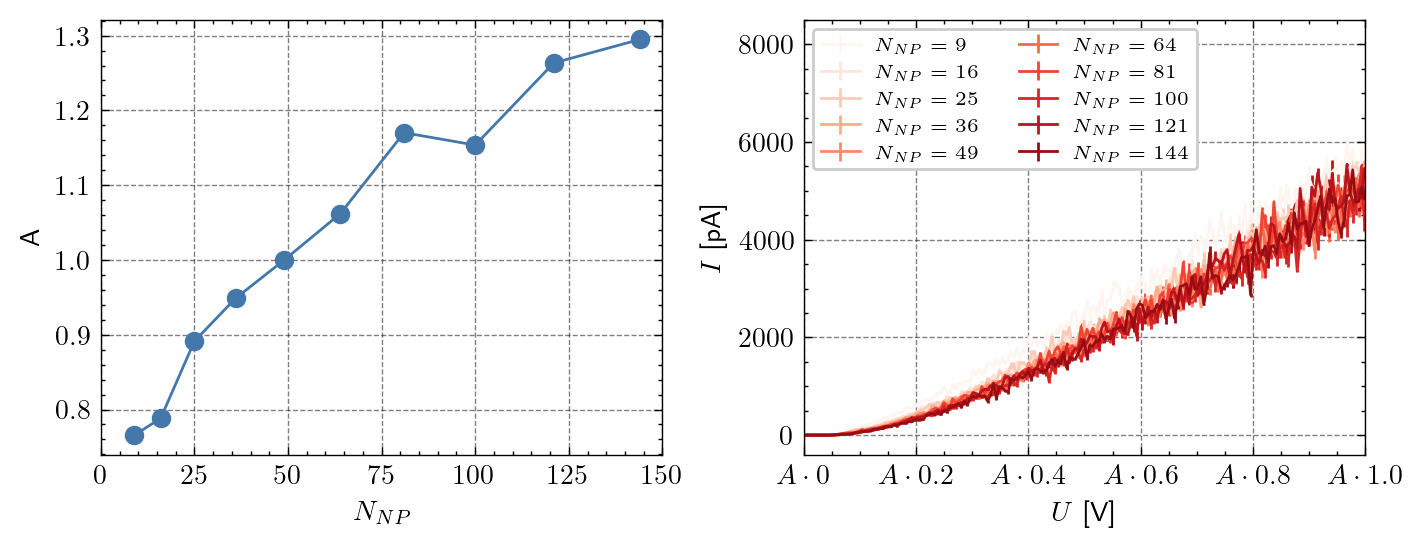

In [8]:
with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)
    ax.plot(np.arange(3,13)**2, scale, '-o')
    ax.set_xlim(0,150)
    ax.set_xlabel("$N_{NP}$")
    ax.set_ylabel("A")

    ax  = fig.add_subplot(1,2,2)
    for i, N in enumerate(range(3,13)):

        ax.errorbar(V_arr[:,0], results_c_new[N][:,2], results_c_new[N][:,3], c=cmap(i/len(results_c_new.keys())), label='$N_{NP} = '+f' {N*N}$')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='x-small', ncol=2)
    ax.set_xlim(0.0,1.0)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_xticklabels([f"$A \cdot {i}$" for i in [0,0.2,0.4,0.6,0.8,1.0]])
    # fig.savefig("docs/I_V_cubic_network_after_scaling.png")

In [12]:
p, cov = curve_fit(fit_func, np.arange(3,13)**2, scale)

In [15]:
scale_new = fit_func(np.arange(3,13)**2, *p)
scale_new

array([0.8141392 , 0.84185059, 0.87747953, 0.921026  , 0.97249001,
       1.03187156, 1.09917066, 1.17438729, 1.25752146, 1.34857318])

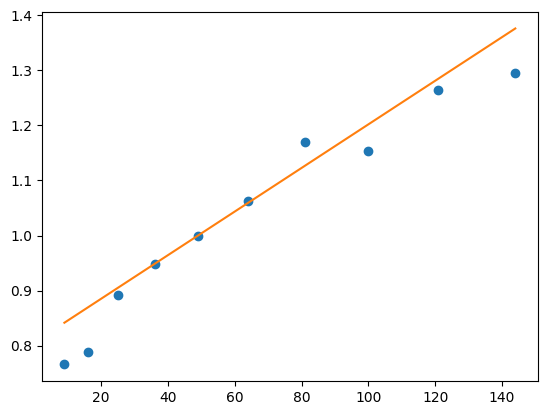

In [17]:
plt.plot(np.arange(3,13)**2, scale, 'o')
plt.plot(np.arange(3,13)**2, fit_func(np.arange(3,13)**2, *p) + (1 - 0.97249001))

In [11]:
np.round(scale,4)

array([0.7658, 0.7883, 0.8914, 0.9488, 1.    , 1.0621, 1.1702, 1.1536,
       1.2635, 1.2949])

## String of Nanoparticles

In [28]:
results     = {}
V_arr       = np.zeros((100,3))
V_min       = 0.5
V_max       = 1.0
V_arr[:,0]  = np.linspace(V_min, V_max, 100, endpoint=True)

for N in range(2,100,2):

    topology_parameter  = return_string_topology(N)
    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    
    np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)

    results[N] = np_network_cubic.return_output_values()

In [29]:
p_vals = []

for N in results.keys():

    p, cov = curve_fit(fit_func, V_arr[:,0], results[N][:,2])

    p_vals.append(p)

/home/jonas/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [30]:
slopes  = np.array([p[0] for p in p_vals])
scale   = slopes[5]/slopes

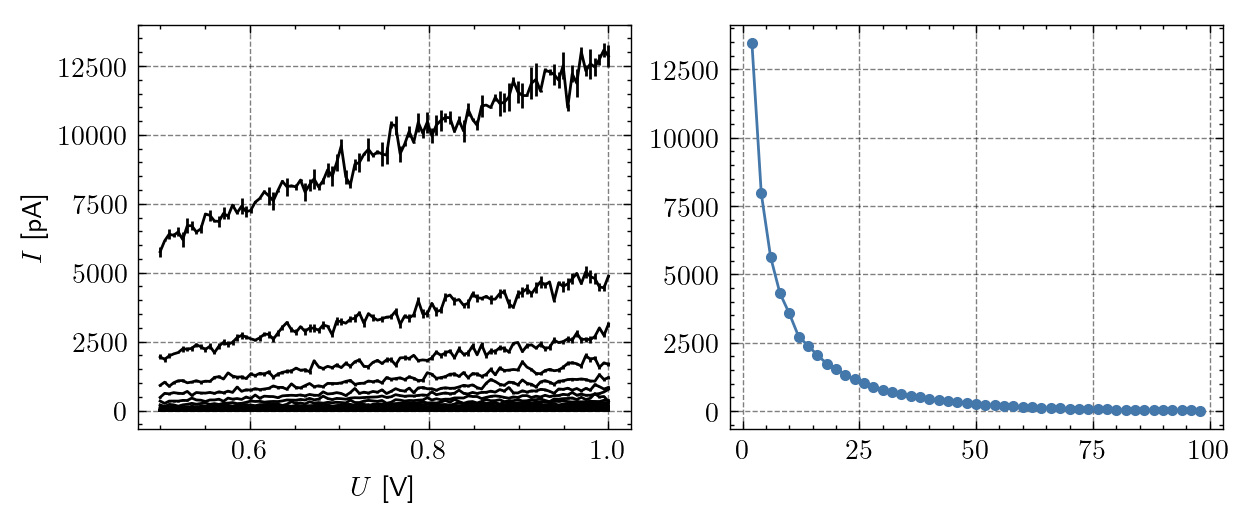

In [46]:
with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(range(2,100,4)):

        ax.errorbar(V_arr[:,0], results[N][:,2], results[N][:,3], c='black')
        # ax.plot(V_arr[:,0], fit_func(V_arr[:,0], *p_vals[i]), 'black')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    # ax.set_ylim(0,1000)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(2,100,2), slopes, '.-')